### 240226. 과제
- 목표: wine 품질 선별 모델 만들기
- 사용 자료: winequality-white.csv

In [1]:
# 모듈 로딩, 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv('../data/winequality-white.csv', sep = ';', header= 1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# alcohol, quality 컬럼만 따로 떼기
new_wine = wine[['alcohol', 'quality', 'fixed acidity']]
new_wine

,alcohol,quality,fixed acidity
0,8.8,6,7.0
1,9.5,6,6.3
2,10.1,6,8.1
3,9.9,6,7.2
4,9.9,6,7.2
...,...,...,...
4893,11.2,6,6.2
4894,9.6,5,6.6
4895,9.4,6,6.5
4896,12.8,7,5.5


전처리
- 결측치 제거
- 이상치 제거
- 중복값 제거
- feature 2개 지정 : alcohol, quality

In [6]:
#결측치
wine.isna() #결측치 없음
wine.describe()
wine= wine[wine.duplicated()==0].reset_index(drop=True) #중복제거

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


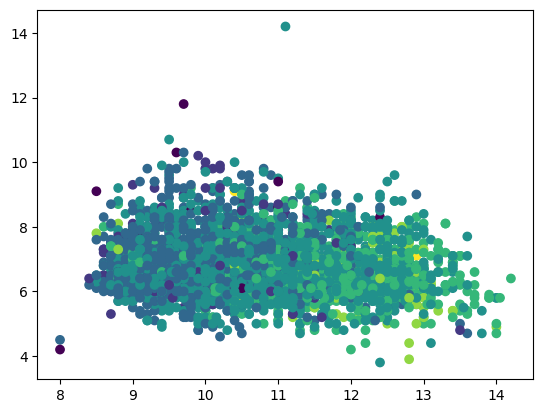

In [4]:
# alcohol, fixed acidity로 구별 가능한지 시각화 확인하기
plt.scatter(wine['alcohol'],wine['fixed acidity'], c =wine['quality'])

# feature = alcohol, fixed acidity
# target = quality

## 기계학습을 위한 데이터 준비: feature / target 분리
- feature / 특성 + target / label / class
- 학습용 데이터셋 = 80
-   ->테스트용 = 20

In [7]:
features = wine[['alcohol', 'fixed acidity']]
features.head()

,alcohol,fixed acidity
0,8.8,7.0
1,9.5,6.3
2,10.1,8.1
3,9.9,7.2
4,9.6,6.2


In [8]:
target = wine['quality']
target.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size = 0.2, stratify= target)

In [10]:
#학습, 테스트용 데이터셋 확인
print(f'학습용 데이터셋 \n {x_train.shape}, {y_train}')
print("="*60)
print(f'테스트용 데이터셋: \n{x_test.shape}, {y_test}')

학습용 데이터셋 
 (3168, 2), 3160    6
2126    5
1643    6
869     6
3577    5
       ..
725     7
2163    5
810     5
3249    6
3087    5
Name: quality, Length: 3168, dtype: int64
테스트용 데이터셋: 
(793, 2), 3221    5
1147    5
3647    6
1106    6
2334    6
       ..
1768    5
2671    6
2542    7
1638    4
2224    5
Name: quality, Length: 793, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x_train)

StandardScaler()

In [14]:
scaler.mean_

array([10.58415299,  6.83751578])

In [15]:
scaler.transform(x_train)

array([[ 0.67079356, -0.84733781],
       [-1.38471915,  0.53135184],
       [-1.13805763,  0.18667942],
       ...,
       [ 0.75301407,  1.68025988],
       [ 0.83523458, -0.96222862],
       [ 0.25969102,  1.22069666]])

In [16]:
# 학습용 데이터 피처 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(3168, 2)

In [17]:
# 테스트용 데이터 피처 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(793, 2)

### 학습 진행 - 방법: KNN

In [18]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [19]:
#학습
model.fit(scaled_x_train, y_train)

KNeighborsClassifier()

## test 진행

In [20]:
model.score(scaled_x_test, y_test)

0.424968474148802

## 예측